#        🎓 Student Performance Data Analytics Project
**Role**:Data Science Student

**Objective**: Analyze student performance dataset to find score trends, gender comparison, and subject performance insights.

**Tools Used**: Python, Pandas, Matplotlib

**Environment**: Google Colab / Jupyter Notebook

**1. Import Required Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True


**2. Load Student Dataset (CSV)**

In [ ]:
from google.colab import files
uploaded = files.upload()

file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)

df.head()


Saving StudentsPerformance_Final.csv to StudentsPerformance_Final (1).csv


,Gender,Group,Parent Edu,Lunch Type,Prep Course,Math,Reading,Writing,Average,Grade,Attendance
0,Female,group B,Bachelor,standard,none,72,72,74,72.67,C,98
1,Female,group C,College,standard,completed,69,90,88,82.33,B,88
2,Female,group B,Master,standard,none,90,95,93,92.67,A,74
3,Male,group A,Associate,free/reduced,none,47,57,44,49.33,D,67
4,Male,group C,College,standard,none,76,78,75,76.33,B,80


**3. Dataset Overview**

In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1000 non-null   object 
 1   Group        1000 non-null   object 
 2   Parent Edu   1000 non-null   object 
 3   Lunch Type   1000 non-null   object 
 4   Prep Course  1000 non-null   object 
 5   Math         1000 non-null   int64  
 6   Reading      1000 non-null   int64  
 7   Writing      1000 non-null   int64  
 8   Average      1000 non-null   float64
 9   Grade        1000 non-null   object 
 10  Attendance   1000 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 86.1+ KB


,Math,Reading,Writing,Average,Attendance
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770580,80.338000
std,15.16308,14.600192,15.195657,14.257311,11.980872
min,0.00000,17.000000,10.000000,9.000000,60.000000
25%,57.00000,59.000000,57.750000,58.330000,70.000000
50%,66.00000,70.000000,69.000000,68.330000,81.000000
75%,77.00000,79.000000,79.000000,77.670000,91.000000
max,100.00000,100.000000,100.000000,100.000000,100.000000


**4. Data Cleaning**

In [ ]:
# Remove duplicates
df = df.drop_duplicates()

# Remove missing values
df = df.dropna()

df.shape


(1000, 11)

**5. Average Score Analysis**

In [ ]:
score_columns = [col for col in df.columns if 'score' in col.lower()]

average_scores = df[score_columns].mean()
average_scores


,0


**6. Gender Performance Comparison (Bar Chart)**

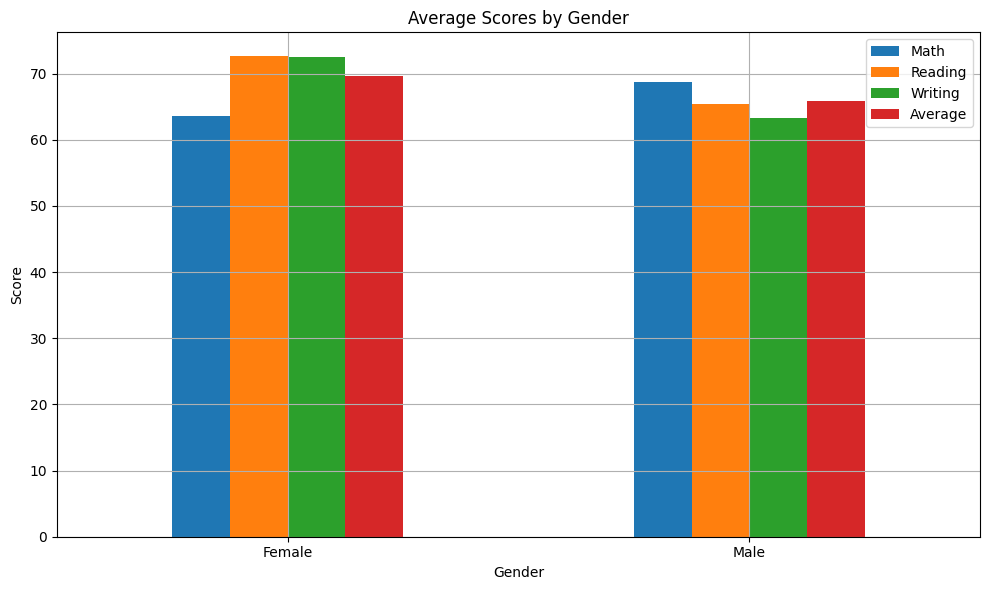

In [ ]:



# Detect gender column
gender_column = [c for c in df.columns if "gender" in c.lower()][0]

# Correctly identify score columns
score_columns = ['Math', 'Reading', 'Writing', 'Average']

# Group and average
gender_scores = df.groupby(gender_column)[score_columns].mean()

# Plot
gender_scores.plot(kind="bar")
plt.title("Average Scores by Gender")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()






**7. Subject Wise Average Score (Bar Chart)**

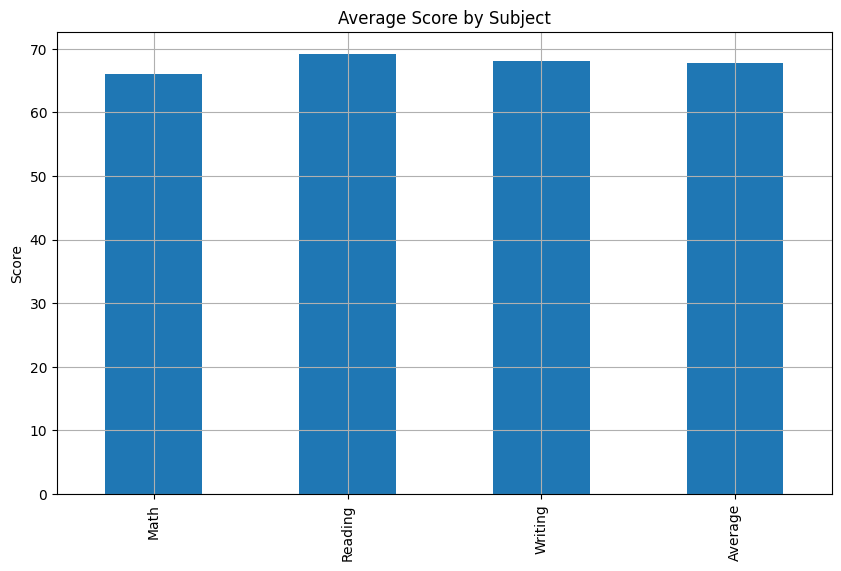

In [ ]:
subject_avg = df[score_columns].mean()
subject_avg
subject_avg.plot(kind='bar')
plt.title("Average Score by Subject")
plt.ylabel("Score")
plt.show()


**8. Top Performing Students**

In [ ]:
df['Total Score'] = df[score_columns].sum(axis=1)

top_students = df.sort_values(by='Total Score', ascending=False).head(10)
top_students


,Gender,Group,Parent Edu,Lunch Type,Prep Course,Math,Reading,Writing,Average,Grade,Attendance,Total Score
916,Male,group E,Bachelor,standard,completed,100,100,100,100.00,A,89,400.00
962,Female,group E,Associate,standard,none,100,100,100,100.00,A,96,400.00
458,Female,group E,Bachelor,standard,none,100,100,100,100.00,A,76,400.00
114,Female,group E,Bachelor,standard,completed,99,100,100,99.67,A,62,398.67
712,Female,group D,College,standard,none,98,100,99,99.00,A,83,396.00
179,Female,group D,High School,standard,completed,97,100,100,99.00,A,87,396.00
165,Female,group C,Bachelor,standard,completed,96,100,100,98.67,A,83,394.67
625,Male,group D,College,standard,completed,100,97,99,98.67,A,72,394.67
685,Female,group E,Master,standard,completed,94,99,100,97.67,A,93,390.67
903,Female,group D,Bachelor,free/reduced,completed,93,100,100,97.67,A,93,390.67


**9. Score Distribution (Histogram)**

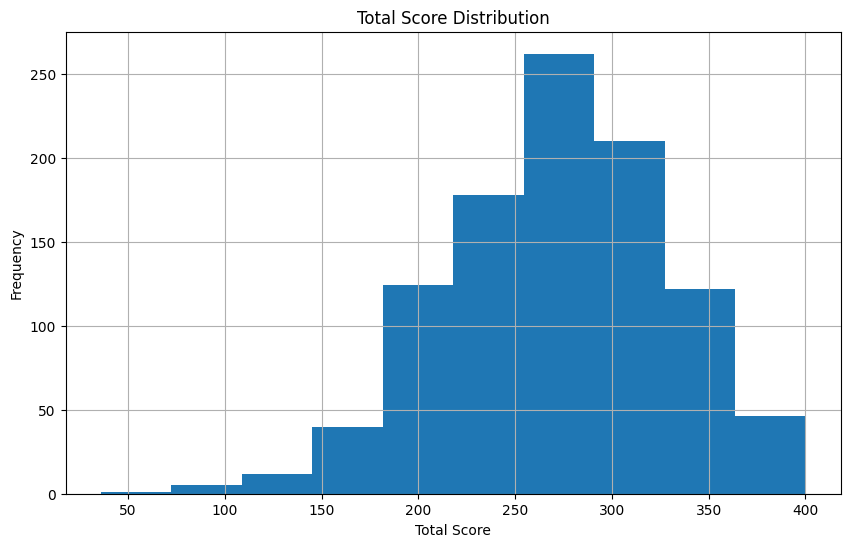

In [ ]:
df['Total Score'].plot(kind='hist', bins=10)
plt.title("Total Score Distribution")
plt.xlabel("Total Score")
plt.show()
